In [1]:
import pandas as pd
import glob

In [2]:
path1='C:/Users/SHUBHAM/Desktop/BTP1/data/Bioceramic'
all_files1=glob.glob(path1+"/*.csv")
bioceramic=pd.read_csv(all_files1[1])
bioceramic=bioceramic.append(pd.read_csv(all_files1[0]))
bioceramic=pd.DataFrame(bioceramic, columns=['EID', 'Title', 'Source title', 'Year', 'Abstract'])
path2='C:/Users/SHUBHAM/Desktop/BTP1/data/Cell'
all_files2=glob.glob(path2+"/*.csv")
cell=pd.read_csv(all_files2[0])
for f in range(1,11):
    cell=cell.append(pd.read_csv(all_files2[f]))
cell=pd.DataFrame(cell, columns=['EID', 'Title', 'Source title', 'Year', 'Abstract'])
bioceramic=bioceramic.sort_values('Year')
cell=cell.sort_values('Year')

In [3]:
bioceramic.to_excel(r'C:\Users\SHUBHAM\Desktop\BTP1\bioceramic\bioceramic.xlsx', index = False)
cell.to_excel(r'C:\Users\SHUBHAM\Desktop\BTP1\cell\cell.xlsx', index = False)
cell=pd.read_csv('C:/Users/SHUBHAM/Desktop/BTP1/Cell.csv')
bioceramic=pd.read_csv('C:/Users/SHUBHAM/Desktop/BTP1/bioceramic.csv')

In [4]:
cell.head()

EID                                              Title  \
0  2-s2.0-84871545562  Degradable Mg-Y-Nd-Mn alloys modified by Sc or Zn   
1  2-s2.0-84870427405  Microscopic mechanism for the 18 magnetization...   
2  2-s2.0-84865102588                    Crystal structure of Dy 2PdGe 6   
3  2-s2.0-84864702334  Foaming of recycled crosslinked polyethylenes ...   
4  2-s2.0-84865079135          BaSnO 3 based thermally stable capacitors   

                                        Source title  Year  \
0                                   Kovove Materialy  2012   
1  Physical Review B - Condensed Matter and Mater...  2012   
2                    Journal of Alloys and Compounds  2012   
3                 Journal of Applied Polymer Science  2012   
4                    Journal of Alloys and Compounds  2012   

                                            Abstract  
0  Magnesium alloys have been recently recognized...  
1  The frustrated quantum magnet SrCu2(BO3)2 show...  
2  The crystal structure of Dy 2PdGe 6 was studie...  
3  Foaming of decrosslinked crosslinked polyethyl...  
4  Microcrystalline BaSn 1-xTi xO 3-0.5mol%GeO 2,...

In [5]:
#to count of number of papers from each source
#for bioceramic
bioceramicdoc=bioceramic['Source title'].value_counts()
bioceramicdoc=pd.DataFrame(bioceramicdoc)
bioceramic_source_count=pd.DataFrame()
index=bioceramicdoc.index
bioceramicdoc.reset_index(drop=True, inplace=True)
bioceramic_source_count['Source title']=index
bioceramic_source_count['count']=bioceramicdoc['Source title']
bioceramic_source_count

Source title  count
0                               Ceramics International    148
1                  Materials Science and Engineering C     84
2                            Key Engineering Materials     75
3                                   Acta Biomaterialia     49
4                                            Materials     46
..                                                 ...    ...
774       Chinese Journal of Environmental Engineering      1
775                         Osteoporosis International      1
776                             Meditsinskaia tekhnika      1
777                            Express Polymer Letters      1
778  Journal of Inorganic and Organometallic Polyme...      1

[779 rows x 2 columns]

In [6]:
#for cell
celldoc=cell['Source title'].value_counts()
celldoc=pd.DataFrame(celldoc)
cell_source_count=pd.DataFrame()
index=celldoc.index
celldoc.reset_index(drop=True, inplace=True)
cell_source_count['Source title']=index
cell_source_count['count']=celldoc['Source title']
cell_source_count

Source title  count
0              ACS Applied Materials and Interfaces    750
1                   Journal of Physical Chemistry C    441
2                                      Biomaterials    400
3                                 Biomacromolecules    365
4                   Journal of Alloys and Compounds    344
..                                              ...    ...
703                  Mechanisms and Machine Science      1
704                       Regenerative Biomaterials      1
705   Colloids and Interface Science Communications      1
706  Faguang Xuebao/Chinese Journal of Luminescence      1
707          International Journal of Nanoparticles      1

[708 rows x 2 columns]

In [10]:
#extracting the source count of bioceramic and cell
bioceramic_source_count.to_excel(r'C:\Users\SHUBHAM\Desktop\BTP1\bioceramic\bioceramic_source_count.xlsx', index = False)
cell_source_count.to_excel(r'C:\Users\SHUBHAM\Desktop\BTP1\cell\cell_source_count.xlsx', index = False)

In [11]:
#lower casing the abstract so that 'text', 'Text, 'TEXT' are treated in the same way and also help in duplication while countint the frequency
cell['Abstract']=cell['Abstract'].str.lower()
bioceramic['Abstract']=bioceramic['Abstract'].str.lower()

In [12]:
#removal pf punctuation
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

cell["Abstract"] = cell["Abstract"].apply(lambda text: remove_punctuation(text))
bioceramic["Abstract"] =  bioceramic["Abstract"].apply(lambda text: remove_punctuation(text))


In [13]:
#removal of stop words.
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
STOP_WORDS = (stopwords.words('english'))

STOP_WORDS.extend(['from', 'subject','made','using','past','years','year','study','showed','groups','used','one','show','ha','time','new','use','useful','hence','objective','aim' 're', 'edu', 'use', 'ieee', 'elsevier', 'ltd', 'rights', 'also', 'find', 'may', 'include', 'sample', 'effect', 'test',  'phase', 'number', 'study', 'absence', 'rate', 'model','case','area','angle','role','type','line','order','review','conclusion','day','days','results','groups','material','system','design','stage','content','author','ability','agent','group','result','experiment','summary','field','research','technique','application','interest'])
STOP_WORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOP_WORDS])

bioceramic["Abstract"] = bioceramic["Abstract"].apply(lambda text: remove_stopwords(text))
cell["Abstract"] = cell["Abstract"].apply(lambda text: remove_stopwords(text))


In [15]:
bioceramic.head()

EID                                              Title  \
0  2-s2.0-79952761943  Surface modification of magnetron-sputtered hy...   
1  2-s2.0-80155199729  Secondary reconstruction of posttraumatic enop...   
2  2-s2.0-79960387245  Development and characterization of bovine hyd...   
3  2-s2.0-85019640216  The kinetics of phenol degradation by free and...   
4  2-s2.0-79957790573  Mesoporous bioactive glasses: Mechanical reinf...   

                                        Source title  Year  \
0                    Surface and Coatings Technology  2011   
1                 Archives of Facial Plastic Surgery  2011   
2                        Advanced Materials Research  2011   
3  Bacteria in Environmental Biotechnology: The M...  2011   
4                                 Acta Biomaterialia  2011   

                                            Abstract  
0  significant advances bioceramics particularly ...  
1  compare individually prefabricated computer as...  
2  porous hydroxyapatite ceramics found enormous ...  
3  kinetics phenol degradation immobilizedbacteri...  
4  mesoporous bioactive glasses mbgs constitute f...

In [16]:
cell.head()

EID                                              Title  \
0  2-s2.0-84871545562  Degradable Mg-Y-Nd-Mn alloys modified by Sc or Zn   
1  2-s2.0-84870427405  Microscopic mechanism for the 18 magnetization...   
2  2-s2.0-84865102588                    Crystal structure of Dy 2PdGe 6   
3  2-s2.0-84864702334  Foaming of recycled crosslinked polyethylenes ...   
4  2-s2.0-84865079135          BaSnO 3 based thermally stable capacitors   

                                        Source title  Year  \
0                                   Kovove Materialy  2012   
1  Physical Review B - Condensed Matter and Mater...  2012   
2                    Journal of Alloys and Compounds  2012   
3                 Journal of Applied Polymer Science  2012   
4                    Journal of Alloys and Compounds  2012   

                                            Abstract  
0  magnesium alloys recently recognized biodegrad...  
1  frustrated quantum magnet srcu2bo32 shows rema...  
2  crystal structure dy 2pdge 6 studied xray diff...  
3  foaming decrosslinked crosslinked polyethylene...  
4  microcrystalline basn 1xti xo 305molgeo 2 x 0 ...

In [17]:
#converting abstarct to list
bio_abstract=bioceramic.Abstract.values.tolist()

In [18]:
import re
bio_abstract = [re.sub("\'", "", str(abstract)) for abstract in bio_abstract]
# Remove all non keyboard characters
bio_abstract = [re.sub('[^A-Za-z0-9]+', " ", str(abstract)) for abstract in bio_abstract]
bio_abstract


['significant advances bioceramics particularly hydroxyapatite 10 emphasis shifted towards designing enhanced bioactivity bone tissue repair aim assess whether surface wettability correlated cellular interactions siliconsubstituted hydroxyapatite sihacoated titanium ti substrates siha thin coatings varying si compositions deposited ti substrates via magnetron cosputtering coatings subjected vitro primary human ostoeblast hob cells evaluate biological property hob cells initial poor adhesion spreading hydrophobic ti surface siha thin coatings ti substrates magnetron cosputtering renders surface hydrophilic water contact angles 30 40 hob cells attached spread proliferated well coatings enhanced calcification formation calcium phosphate nodules across collagenous matrices observed siha coatings increasing si interdisciplinary paper highlighted enhanced bioactivity associated surface wettability producing nanostructured coating ti substrate magnetron sputtering resulted promotion cell prol

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess


In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

abstracts_words = list(sent_to_words(bio_abstract))


In [22]:
abstracts_words

[['significant',
  'advances',
  'bioceramics',
  'particularly',
  'hydroxyapatite',
  'emphasis',
  'shifted',
  'towards',
  'designing',
  'enhanced',
  'bioactivity',
  'bone',
  'tissue',
  'repair',
  'aim',
  'assess',
  'whether',
  'surface',
  'wettability',
  'correlated',
  'cellular',
  'interactions',
  'hydroxyapatite',
  'sihacoated',
  'titanium',
  'ti',
  'substrates',
  'siha',
  'thin',
  'coatings',
  'varying',
  'si',
  'compositions',
  'deposited',
  'ti',
  'substrates',
  'via',
  'magnetron',
  'cosputtering',
  'coatings',
  'subjected',
  'vitro',
  'primary',
  'human',
  'ostoeblast',
  'hob',
  'cells',
  'evaluate',
  'biological',
  'property',
  'hob',
  'cells',
  'initial',
  'poor',
  'adhesion',
  'spreading',
  'hydrophobic',
  'ti',
  'surface',
  'siha',
  'thin',
  'coatings',
  'ti',
  'substrates',
  'magnetron',
  'cosputtering',
  'renders',
  'surface',
  'hydrophilic',
  'water',
  'contact',
  'angles',
  'hob',
  'cells',
  'attache

In [23]:
from gensim.models import Phrases
bigram = Phrases(abstracts_words, min_count=3, threshold=10) 
trigram = Phrases(bigram[abstracts_words], threshold=10)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


In [25]:
# Form Bigrams
abstracts_words_bigrams = make_bigrams(abstracts_words)

# Form Trigrams
abstracts_words_trigrams = make_trigrams(abstracts_words_bigrams)

#abstracts_words_bigrams


In [26]:
import spacy


def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [27]:
import spacy
import en_core_web_sm
nlp=en_core_web_sm.load(disable=['parser', 'ner'])
#nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(abstracts_words_trigrams, allowed_postags=['NOUN'])

In [28]:
print(data_lemmatized[:3])

[['advance', 'bioactivity', 'repair', 'interaction', 'hydroxyapatite', 'substrate', 'coating', 'si', 'composition', 'substrate', 'coating', 'hob', 'cell', 'property', 'hob', 'cell', 'hydrophobic', 'surface', 'coating', 'angle', 'spread', 'coating', 'calcification', 'formation', 'calcium_phosphate', 'matrix', 'coating', 'si', 'paper', 'bioactivity', 'substrate', 'magnetron_sputtering', 'promotion', 'si_substitution', 'coating', 'dental', 'bv'], ['computer', 'cadcam', 'implant', 'titanium', 'floor', 'reconstruction', 'correction', 'method', 'cohort', 'correction', 'cadcam', 'implant', 'datum', 'operation', 'position', 'operation', 'tendency', 'relapse', 'enophthalmos', 'cadcam', 'position', 'cadcam', 'conclusion', 'cadcam', 'implant', 'titanium', 'mesh', 'enophthalmo', 'correction', 'cost', 'cadcam', 'implant', 'case', 'correction'], ['ceramic', 'biomedical_application', 'bone_tissue_regeneration', 'paper', 'preparation', 'bovine', 'bone_graft', 'powder', 'porogen', 'powder', 'pressing_m

In [29]:
import pickle
PKL_Loc = "C:/Users/SHUBHAM/Desktop/BTP1/"
file = open(PKL_Loc + 'bioceramic_data_lemmatized.pkl', 'wb')
pickle.dump(data_lemmatized, file)
file.close()

In [30]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)


In [31]:
print(id2word)

Dictionary(8574 unique tokens: ['advance', 'angle', 'bioactivity', 'bv', 'calcification']...)


In [32]:
# Term Document Frequency
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]


In [33]:
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                          )




In [35]:
model_loc="C:/Users/SHUBHAM/Desktop/BTP1/"
lda_model.save(model_loc + 'N_New_LDA.model')

In [36]:
from pprint import pprint

In [37]:
pprint(lda_model.print_topics())

[(0,
  '0.022*"surface" + 0.018*"sample" + 0.014*"material" + 0.011*"layer" + '
  '0.010*"property" + 0.010*"formation" + 0.009*"scaffold" + 0.009*"bone" + '
  '0.008*"biocermet" + 0.008*"cell"'),
 (1,
  '0.026*"coating" + 0.017*"surface" + 0.014*"sample" + 0.011*"structure" + '
  '0.009*"treatment" + 0.009*"material" + 0.009*"ceramic" + 0.009*"strength" + '
  '0.007*"bioceramic" + 0.007*"mechanical_propertie"'),
 (2,
  '0.017*"bone" + 0.017*"property" + 0.017*"material" + 0.016*"scaffold" + '
  '0.014*"structure" + 0.013*"method" + 0.011*"surface" + 0.011*"patient" + '
  '0.010*"bioceramic" + 0.009*"application"'),
 (3,
  '0.028*"bond_strength" + 0.012*"filtration" + 0.011*"cavity" + '
  '0.011*"densification" + 0.011*"blend" + 0.010*"method" + 0.009*"volume" + '
  '0.009*"fibre" + 0.009*"emission" + 0.009*"sample"'),
 (4,
  '0.022*"bone" + 0.017*"cell" + 0.016*"material" + 0.013*"property" + '
  '0.012*"scaffold" + 0.012*"structure" + 0.011*"bioceramic" + 0.011*"surface" '
  '+ 0.010

In [38]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  


Perplexity:  -8.610540800811885


In [39]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.30184543118561324


In [40]:
pprint(lda_model.show_topics(formatted=False))

[(11,
  [('cell', 0.0154188145),
   ('bone', 0.014910223),
   ('value', 0.013898725),
   ('study', 0.013782699),
   ('effect', 0.010703296),
   ('tooth', 0.010702663),
   ('source', 0.0076815514),
   ('week', 0.00749328),
   ('training', 0.0072416477),
   ('fracture', 0.007132998)]),
 (17,
  [('treatment', 0.015660577),
   ('bioceramic', 0.012273527),
   ('addition', 0.01174135),
   ('nanoparticle', 0.011067886),
   ('coating', 0.010200437),
   ('bone', 0.010154169),
   ('week', 0.009847014),
   ('method', 0.008710511),
   ('implant', 0.007447302),
   ('material', 0.007373725)]),
 (4,
  [('bone', 0.021599116),
   ('cell', 0.016800221),
   ('material', 0.016055858),
   ('property', 0.01293495),
   ('scaffold', 0.01175375),
   ('structure', 0.0116662495),
   ('bioceramic', 0.011475406),
   ('surface', 0.010624752),
   ('method', 0.009956605),
   ('implant', 0.009735765)]),
 (9,
  [('material', 0.024020536),
   ('bioceramic', 0.020964593),
   ('structure', 0.016688595),
   ('degradation',

In [41]:
from gensim.models.wrappers import LdaMallet


In [42]:


mallet_path = 'C:\\mallet-2.0.8\\bin\\mallet'


In [43]:
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [44]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [45]:
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.047872  0.051449       1        1  12.557560
9      0.076838  0.022573       2        1   8.716636
14     0.114734 -0.009052       3        1   7.828740
4      0.045134  0.029446       4        1   7.749873
8      0.002894  0.033834       5        1   7.100904
1     -0.037668  0.079497       6        1   6.147045
0      0.010425  0.033498       7        1   5.250292
19    -0.077958  0.063488       8        1   4.582059
5      0.019294  0.075763       9        1   4.475193
15     0.007741 -0.000966      10        1   4.326150
13     0.068477 -0.008316      11        1   4.194425
6      0.035220 -0.092521      12        1   3.885967
18    -0.074954  0.030454      13        1   3.536237
17    -0.031432  0.036810      14        1   3.529260
11    -0.039503 -0.080081      15        1   3.373288
16    -0.025998 -0.053069      16        1   3.025693
10     0.067027 -0.023719      17        1   2.828915
12    -0.031221 -0.139956      18        1   2.656305
7     -0.035609 -0.051501      19        1   2.270221
3     -0.141312  0.002368      20        1   1.965250, topic_info=              Term         Freq        Total Category  logprob  loglift
175       scaffold  1368.000000  1368.000000  Default  30.0000  30.0000
7          coating   674.000000   674.000000  Default  29.0000  29.0000
340          tooth   266.000000   266.000000  Default  28.0000  28.0000
131       material  1115.000000  1115.000000  Default  27.0000  27.0000
948  bond_strength    89.000000    89.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
334       strength     9.524942   254.173340  Topic20  -5.1074   0.6454
694       specimen     8.782216   117.477989  Topic20  -5.1886   1.3360
47        analysis     9.242963   302.766479  Topic20  -5.1375   0.4405
588         system     8.303641    96.721222  Topic20  -5.2447   1.4744
2      bioactivity     8.705914   341.372375  Topic20  -5.1974   0.2606

[1396 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
7426      9  0.878493         absorbent
2698     17  0.804848         absorbing
1405      3  0.169679         abundance
1405     20  0.678715         abundance
5002     17  0.809076                ac
...     ...       ...               ...
5399     13  0.055417              zinc
5399     15  0.083126              zinc
2522      2  0.878814  zirconia_ceramic
7622     11  0.792200         zn_doping
5328     13  0.856877               zta

[4718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 15, 5, 9, 2, 1, 20, 6, 16, 14, 7, 19, 18, 12, 17, 11, 13, 8, 4])

In [46]:
from wordcloud import WordCloud#, STOPWORDS

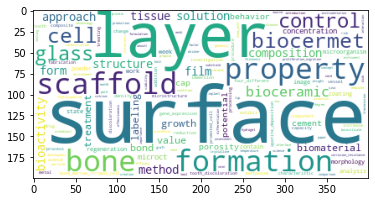

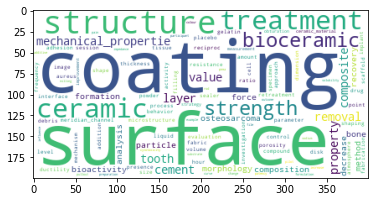

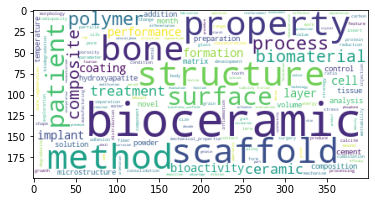

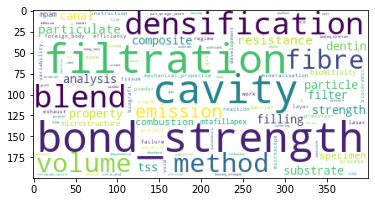

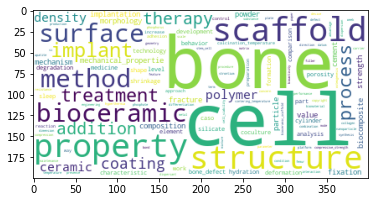

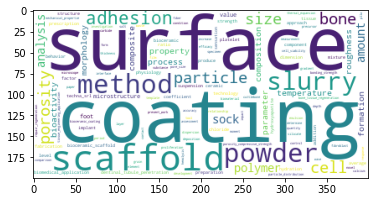

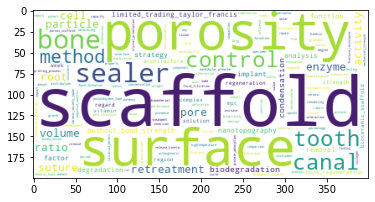

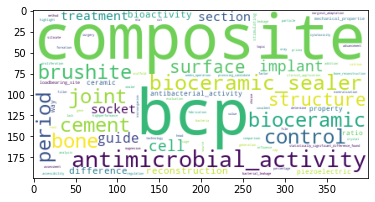

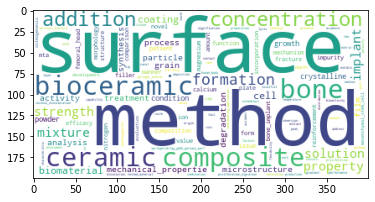

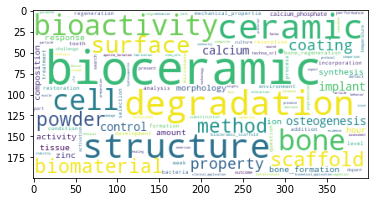

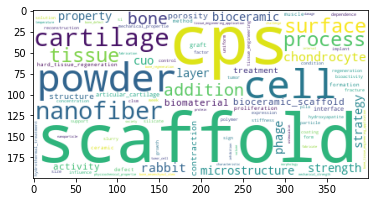

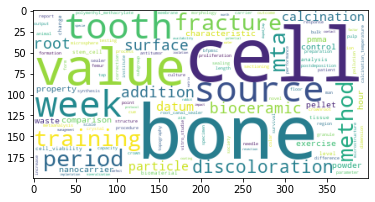

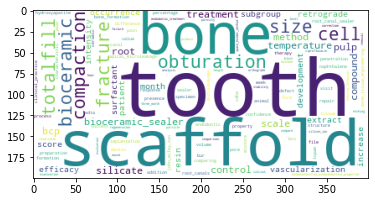

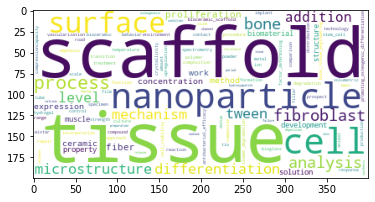

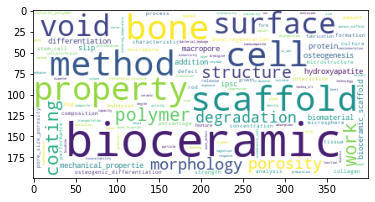

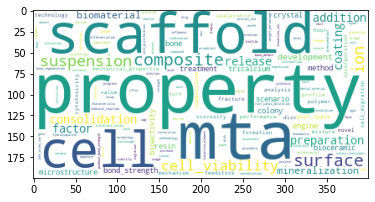

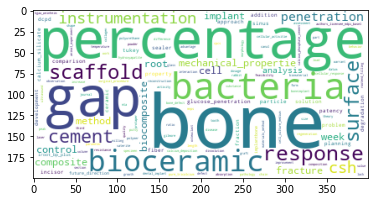

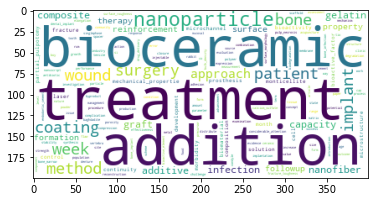

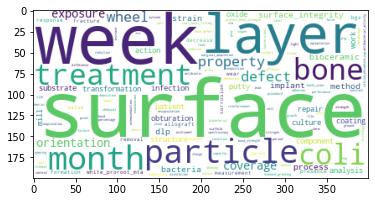

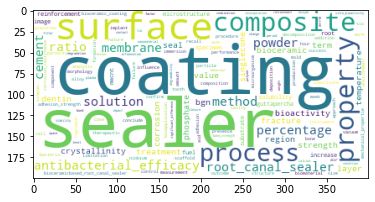

In [47]:
import matplotlib.pyplot as plt
import numpy as np
for t in range(lda_model.num_topics):
    plt.figure()
    cloud = WordCloud(stopwords=STOP_WORDS, background_color='white').generate(" ".join(np.array(lda_model.show_topic(t, 200))[: , 0]))
    plt.imshow(cloud)
